In [2]:
import pandas as pd

In [3]:
df  = pd.read_csv(
   'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


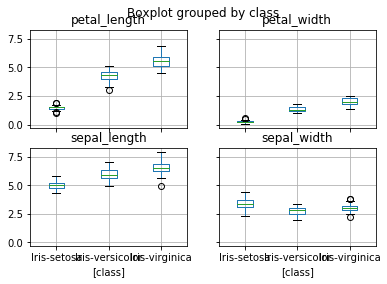

In [7]:
df.boxplot(by='class');

In [9]:
selected_column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [10]:
X = df[selected_column]
y = df['class']

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5)
# cv is fold

In [16]:
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [17]:
scores.mean()

0.9733333333333334

In [18]:
knn = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(knn, X, y, cv=5)
scores.mean()

0.9466666666666665

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=5)
scores.mean()

0.9666666666666668

In [20]:
knn = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(knn, X, y, cv=5)
scores.mean()

0.9733333333333334

In [21]:
knn = KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(knn, X, y, cv=5) # knn was trained here in cross_val_score function
scores.mean()

0.9800000000000001

In [22]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [23]:
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6],
    'weights': ['uniform', 'distance'],
    'leaf_size': [1, 10, 15, 20, 25, 30]
}

In [51]:
knn = KNeighborsClassifier()

In [52]:
g = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)

In [53]:
g.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6], 'weights': ['uniform', 'distance'], 'leaf_size': [1, 10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [54]:
g.cv_results_

{'mean_fit_time': array([0.00547733, 0.00553684, 0.00462937, 0.00507874, 0.00356956,
        0.00445738, 0.00466242, 0.00327716, 0.00308666, 0.0033524 ,
        0.00355215, 0.00361876, 0.00437679, 0.00384059, 0.00431204,
        0.00263705, 0.0026978 , 0.00189538, 0.00189638, 0.00192118,
        0.00191126, 0.00223031, 0.00356789, 0.0020812 , 0.0018857 ,
        0.00189056, 0.00191846, 0.00181694, 0.00203948, 0.00478125,
        0.00575104, 0.00839543, 0.00698638, 0.00353518, 0.00333633,
        0.00293198, 0.00288143, 0.00392547, 0.00430007, 0.00385065,
        0.00361238, 0.00353899, 0.00301743, 0.00361104, 0.00438051,
        0.00381103, 0.00219178, 0.00249972, 0.00428638, 0.00397944,
        0.00354438, 0.00370483, 0.00284538, 0.00342474, 0.00499492,
        0.00421643, 0.00362029, 0.00350585, 0.003405  , 0.00321298,
        0.00385442, 0.00367508, 0.00315542, 0.00349855, 0.00317678,
        0.00365624, 0.00446548, 0.00405107, 0.00509515, 0.0022625 ,
        0.00269842, 0.00213985]

In [55]:
g.best_score_

0.98

In [56]:
g.best_params_

{'leaf_size': 1, 'n_neighbors': 6, 'weights': 'uniform'}

In [57]:
from sklearn.preprocessing import scale

In [58]:
selected_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [59]:
X = df[selected_columns]

In [62]:
X_new = scale(X)

In [63]:
g = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)

In [65]:
g.fit(X_new, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6], 'weights': ['uniform', 'distance'], 'leaf_size': [1, 10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
g.best_score_

0.9666666666666667

In [ ]:
scale(df[])